# Classifying Identifiable People Using Image Classification
Identify whether individuals in an image are "identifiable" or "unidentifiable". Images are considered "identifiable" if they clearly show an individual's face with no obstructions (mask, sunglasses, etc.). An applicaton of this project may be for companies that need to keep track of everyone visiting their locations.

## Building a Classification Model
### Step 1: Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

### Step 2: Load the Data

In [2]:
labels = ['identifiable', 'unidentifiable']
img_size = 224

def get_data(data_dir):
    """Return a numpy array

    Numpy array containing train or testing set data values. Read the images from 
    data_dir in the RGB format and resize the images to the desired width and height.
    """
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label) # 0: identifiable, 1: unidentifiable
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [3]:
# Fetch the train and validation data.
train = get_data('images dataset/Training Set')
val = get_data('images dataset/Testing Set')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


### Step 3: Visualize the data

<AxesSubplot:ylabel='count'>

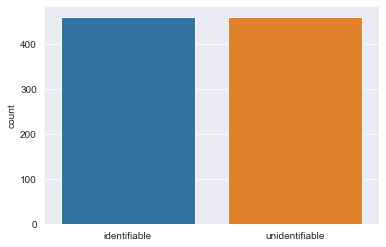

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("identifiable")
    else:
        l.append("unidentifiable")
sns.set_style('darkgrid')
sns.countplot(x=l)

Text(0.5, 1.0, 'identifiable')

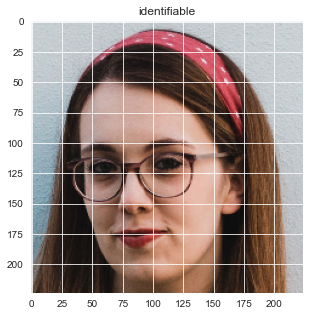

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'unidentifiable')

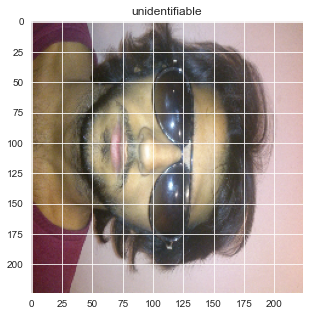

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

### Step 4: Data Preprocessing and Augmentation

In [7]:
# Preprocess the data
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [8]:
# Augment the data
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

### Step 5: Define the Model

In [9]:
# Define a simple CNN with 3 Convolutional layers followed by max-pooling layers. 
#   A dropout layer is added after the 3rd maxpool operation to avoid overfitting.
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [10]:
# Compile the model using the Adam optimizer.
#   SparseCategoricalCrossentropy is the loss function.
#   Use a lower learning rate of 0.000001 for a smoother curve.
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [11]:
# epochs represent the number of times the model goes through the training set.
#   The model can be updated multiple times during one epoch.
#   Train the model for 500 epochs because the learning rate is so small.
#      500 epochs will produce a runtime of nearly 4 hours on a local machine.
numEpochs = 500
history = model.fit(x_train,y_train,epochs = numEpochs , validation_data = (x_val, y_val))

Epoch 1/500
29/29 [==============================] - 49s 2s/step - loss: 0.6951 - accuracy: 0.5057 - val_loss: 0.6920 - val_accuracy: 0.5038
Epoch 2/500
29/29 [==============================] - 47s 2s/step - loss: 0.6910 - accuracy: 0.5228 - val_loss: 0.6911 - val_accuracy: 0.5266
Epoch 3/500
29/29 [==============================] - 42s 1s/step - loss: 0.6953 - accuracy: 0.4925 - val_loss: 0.6912 - val_accuracy: 0.5342
Epoch 4/500
29/29 [==============================] - 43s 1s/step - loss: 0.6888 - accuracy: 0.5246 - val_loss: 0.6897 - val_accuracy: 0.5620
Epoch 5/500
29/29 [==============================] - 40s 1s/step - loss: 0.6841 - accuracy: 0.5428 - val_loss: 0.6887 - val_accuracy: 0.5544
Epoch 6/500
29/29 [==============================] - 41s 1s/step - loss: 0.6911 - accuracy: 0.5353 - val_loss: 0.6877 - val_accuracy: 0.5772
Epoch 7/500
29/29 [==============================] - 40s 1s/step - loss: 0.6940 - accuracy: 0.5102 - val_loss: 0.6866 - val_accuracy: 0.5848
Epoch 8/500
2

Epoch 59/500
29/29 [==============================] - 40s 1s/step - loss: 0.5967 - accuracy: 0.7274 - val_loss: 0.6217 - val_accuracy: 0.6684
Epoch 60/500
29/29 [==============================] - 40s 1s/step - loss: 0.5884 - accuracy: 0.7409 - val_loss: 0.6205 - val_accuracy: 0.6759
Epoch 61/500
29/29 [==============================] - 44s 2s/step - loss: 0.6010 - accuracy: 0.7296 - val_loss: 0.6185 - val_accuracy: 0.6658
Epoch 62/500
29/29 [==============================] - 40s 1s/step - loss: 0.6164 - accuracy: 0.6794 - val_loss: 0.6170 - val_accuracy: 0.6684
Epoch 63/500
29/29 [==============================] - 41s 1s/step - loss: 0.6020 - accuracy: 0.7195 - val_loss: 0.6152 - val_accuracy: 0.6810
Epoch 64/500
29/29 [==============================] - 2706s 97s/step - loss: 0.5942 - accuracy: 0.7331 - val_loss: 0.6138 - val_accuracy: 0.6759
Epoch 65/500
29/29 [==============================] - 113s 4s/step - loss: 0.5976 - accuracy: 0.7147 - val_loss: 0.6122 - val_accuracy: 0.6785
Ep

29/29 [==============================] - 42s 1s/step - loss: 0.4756 - accuracy: 0.8311 - val_loss: 0.5297 - val_accuracy: 0.7595
Epoch 117/500
29/29 [==============================] - 41s 1s/step - loss: 0.4784 - accuracy: 0.7976 - val_loss: 0.5288 - val_accuracy: 0.7519
Epoch 118/500
29/29 [==============================] - 47s 2s/step - loss: 0.4784 - accuracy: 0.8054 - val_loss: 0.5271 - val_accuracy: 0.7620
Epoch 119/500
29/29 [==============================] - 41s 1s/step - loss: 0.4810 - accuracy: 0.8246 - val_loss: 0.5258 - val_accuracy: 0.7620
Epoch 120/500
29/29 [==============================] - 43s 1s/step - loss: 0.4818 - accuracy: 0.8016 - val_loss: 0.5246 - val_accuracy: 0.7671
Epoch 121/500
29/29 [==============================] - 41s 1s/step - loss: 0.4727 - accuracy: 0.8086 - val_loss: 0.5233 - val_accuracy: 0.7646
Epoch 122/500
29/29 [==============================] - 40s 1s/step - loss: 0.4781 - accuracy: 0.8163 - val_loss: 0.5223 - val_accuracy: 0.7570
Epoch 123/500

29/29 [==============================] - 44s 2s/step - loss: 0.4131 - accuracy: 0.8561 - val_loss: 0.4661 - val_accuracy: 0.8127
Epoch 174/500
29/29 [==============================] - 40s 1s/step - loss: 0.4208 - accuracy: 0.8385 - val_loss: 0.4654 - val_accuracy: 0.8025
Epoch 175/500
29/29 [==============================] - 39s 1s/step - loss: 0.4042 - accuracy: 0.8555 - val_loss: 0.4642 - val_accuracy: 0.8152
Epoch 176/500
29/29 [==============================] - 41s 1s/step - loss: 0.4103 - accuracy: 0.8555 - val_loss: 0.4633 - val_accuracy: 0.8177
Epoch 177/500
29/29 [==============================] - 39s 1s/step - loss: 0.4166 - accuracy: 0.8288 - val_loss: 0.4624 - val_accuracy: 0.8177
Epoch 178/500
29/29 [==============================] - 42s 1s/step - loss: 0.3942 - accuracy: 0.8586 - val_loss: 0.4614 - val_accuracy: 0.8127
Epoch 179/500
29/29 [==============================] - 52s 2s/step - loss: 0.4179 - accuracy: 0.8327 - val_loss: 0.4611 - val_accuracy: 0.8101
Epoch 180/500

29/29 [==============================] - 48s 2s/step - loss: 0.3628 - accuracy: 0.8544 - val_loss: 0.4190 - val_accuracy: 0.8228
Epoch 231/500
29/29 [==============================] - 51s 2s/step - loss: 0.3728 - accuracy: 0.8633 - val_loss: 0.4182 - val_accuracy: 0.8228
Epoch 232/500
29/29 [==============================] - 44s 2s/step - loss: 0.3399 - accuracy: 0.8767 - val_loss: 0.4177 - val_accuracy: 0.8228
Epoch 233/500
29/29 [==============================] - 39s 1s/step - loss: 0.3513 - accuracy: 0.8869 - val_loss: 0.4166 - val_accuracy: 0.8203
Epoch 234/500
29/29 [==============================] - 39s 1s/step - loss: 0.3484 - accuracy: 0.8560 - val_loss: 0.4168 - val_accuracy: 0.8177
Epoch 235/500
29/29 [==============================] - 40s 1s/step - loss: 0.3635 - accuracy: 0.8579 - val_loss: 0.4152 - val_accuracy: 0.8228
Epoch 236/500
29/29 [==============================] - 40s 1s/step - loss: 0.3489 - accuracy: 0.8563 - val_loss: 0.4147 - val_accuracy: 0.8228
Epoch 237/500

29/29 [==============================] - 39s 1s/step - loss: 0.3109 - accuracy: 0.9071 - val_loss: 0.3885 - val_accuracy: 0.8304
Epoch 288/500
29/29 [==============================] - 39s 1s/step - loss: 0.3229 - accuracy: 0.8771 - val_loss: 0.3909 - val_accuracy: 0.8278
Epoch 289/500
29/29 [==============================] - 40s 1s/step - loss: 0.3077 - accuracy: 0.8874 - val_loss: 0.3879 - val_accuracy: 0.8253
Epoch 290/500
29/29 [==============================] - 54s 2s/step - loss: 0.3205 - accuracy: 0.8961 - val_loss: 0.3881 - val_accuracy: 0.8278
Epoch 291/500
29/29 [==============================] - 42s 1s/step - loss: 0.3119 - accuracy: 0.8678 - val_loss: 0.3872 - val_accuracy: 0.8304
Epoch 292/500
29/29 [==============================] - 42s 1s/step - loss: 0.3008 - accuracy: 0.9045 - val_loss: 0.3886 - val_accuracy: 0.8278
Epoch 293/500
29/29 [==============================] - 39s 1s/step - loss: 0.3020 - accuracy: 0.8929 - val_loss: 0.3866 - val_accuracy: 0.8304
Epoch 294/500

29/29 [==============================] - 549s 19s/step - loss: 0.2683 - accuracy: 0.9107 - val_loss: 0.3750 - val_accuracy: 0.8304
Epoch 345/500
29/29 [==============================] - 56s 2s/step - loss: 0.2693 - accuracy: 0.8961 - val_loss: 0.3734 - val_accuracy: 0.8304
Epoch 346/500
29/29 [==============================] - 42s 1s/step - loss: 0.2798 - accuracy: 0.9148 - val_loss: 0.3738 - val_accuracy: 0.8329
Epoch 347/500
29/29 [==============================] - 47s 2s/step - loss: 0.2735 - accuracy: 0.8983 - val_loss: 0.3738 - val_accuracy: 0.8329
Epoch 348/500
29/29 [==============================] - 42s 1s/step - loss: 0.2770 - accuracy: 0.9129 - val_loss: 0.3728 - val_accuracy: 0.8354
Epoch 349/500
29/29 [==============================] - 42s 1s/step - loss: 0.2729 - accuracy: 0.9104 - val_loss: 0.3725 - val_accuracy: 0.8354
Epoch 350/500
29/29 [==============================] - 43s 1s/step - loss: 0.2639 - accuracy: 0.9097 - val_loss: 0.3724 - val_accuracy: 0.8354
Epoch 351/5

29/29 [==============================] - 39s 1s/step - loss: 0.2708 - accuracy: 0.8984 - val_loss: 0.3667 - val_accuracy: 0.8405
Epoch 402/500
29/29 [==============================] - 39s 1s/step - loss: 0.2522 - accuracy: 0.9156 - val_loss: 0.3659 - val_accuracy: 0.8430
Epoch 403/500
29/29 [==============================] - 52s 2s/step - loss: 0.2550 - accuracy: 0.9124 - val_loss: 0.3663 - val_accuracy: 0.8405
Epoch 404/500
29/29 [==============================] - 42s 1s/step - loss: 0.2522 - accuracy: 0.9129 - val_loss: 0.3672 - val_accuracy: 0.8405
Epoch 405/500
29/29 [==============================] - 40s 1s/step - loss: 0.2700 - accuracy: 0.8980 - val_loss: 0.3654 - val_accuracy: 0.8430
Epoch 406/500
29/29 [==============================] - 42s 1s/step - loss: 0.2635 - accuracy: 0.9212 - val_loss: 0.3657 - val_accuracy: 0.8430
Epoch 407/500
29/29 [==============================] - 39s 1s/step - loss: 0.2568 - accuracy: 0.9024 - val_loss: 0.3649 - val_accuracy: 0.8430
Epoch 408/500

29/29 [==============================] - 40s 1s/step - loss: 0.2216 - accuracy: 0.9144 - val_loss: 0.3619 - val_accuracy: 0.8481
Epoch 459/500
29/29 [==============================] - 43s 2s/step - loss: 0.2508 - accuracy: 0.9051 - val_loss: 0.3623 - val_accuracy: 0.8481
Epoch 460/500
29/29 [==============================] - 41s 1s/step - loss: 0.2456 - accuracy: 0.9072 - val_loss: 0.3640 - val_accuracy: 0.8456
Epoch 461/500
29/29 [==============================] - 40s 1s/step - loss: 0.2421 - accuracy: 0.9069 - val_loss: 0.3628 - val_accuracy: 0.8456
Epoch 462/500
29/29 [==============================] - 41s 1s/step - loss: 0.2375 - accuracy: 0.9212 - val_loss: 0.3640 - val_accuracy: 0.8430
Epoch 463/500
29/29 [==============================] - 40s 1s/step - loss: 0.2225 - accuracy: 0.9322 - val_loss: 0.3616 - val_accuracy: 0.8481
Epoch 464/500
29/29 [==============================] - 40s 1s/step - loss: 0.2242 - accuracy: 0.9292 - val_loss: 0.3628 - val_accuracy: 0.8456
Epoch 465/500

### Step 6: Evaluate the Model

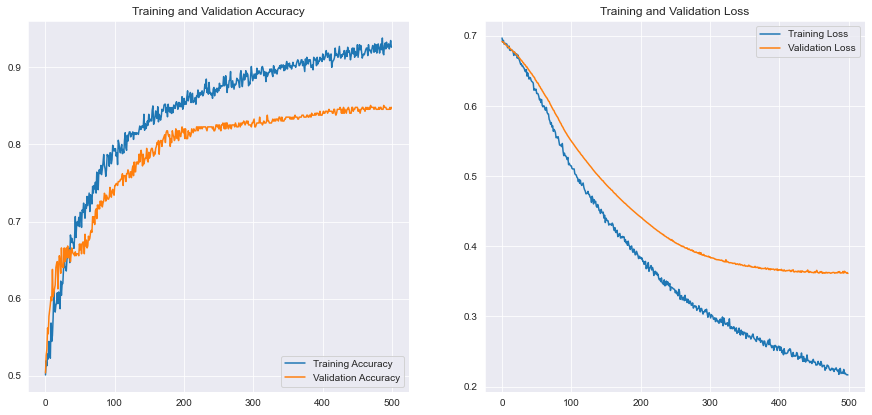

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range is 5 beacause the previous step used 5 epochs
epochs_range = range(numEpochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot( epochs_range, acc, label='Training Accuracy')
plt.plot( epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# predictions = model.predict_classes(x_val)
# above line is soon to be deprecated, is replaced with line below
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Identifiable (Class 0)','Unidentifiable (Class 1)']))

                          precision    recall  f1-score   support

  Identifiable (Class 0)       0.85      0.85      0.85       197
Unidentifiable (Class 1)       0.85      0.85      0.85       198

                accuracy                           0.85       395
               macro avg       0.85      0.85      0.85       395
            weighted avg       0.85      0.85      0.85       395



## Implementing a Pre-Trained Model
### Step 1: Import the Model

In [14]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False,
                                               weights = "imagenet")

In [15]:
base_model.trainable = False

In [16]:
num_classes = 2

y_train = keras.utils.to_categorical(y_train, num_classes, dtype='int64')
y_val_original = y_val
y_val = keras.utils.to_categorical(y_val, num_classes, dtype='int64')

In [17]:
# Line Changed: tf.keras.layers.Dense(2, activation="softmax")
#   Adds a final dense layer with 2 neurons and softmax activation.
#   This led to a ValueError when calling model.fit(...):
#      ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))
#   Possible solution involves changing the dimensions of x_train, y_train, x_val, and/or y_val.
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(num_classes, activation="softmax")                                     
                                ])

In [18]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = numEpochs, validation_data = (x_val,y_val))


Epoch 1/500
29/29 [==============================] - 49s 2s/step - loss: 0.8670 - accuracy: 0.5644 - val_loss: 0.8242 - val_accuracy: 0.6127
Epoch 2/500
29/29 [==============================] - 44s 2s/step - loss: 0.8580 - accuracy: 0.5723 - val_loss: 0.7972 - val_accuracy: 0.6253
Epoch 3/500
29/29 [==============================] - 39s 1s/step - loss: 0.8173 - accuracy: 0.6062 - val_loss: 0.7727 - val_accuracy: 0.6354
Epoch 4/500
29/29 [==============================] - 39s 1s/step - loss: 0.8068 - accuracy: 0.5629 - val_loss: 0.7507 - val_accuracy: 0.6430
Epoch 5/500
29/29 [==============================] - 40s 1s/step - loss: 0.7933 - accuracy: 0.5722 - val_loss: 0.7311 - val_accuracy: 0.6506
Epoch 6/500
29/29 [==============================] - 51s 2s/step - loss: 0.7644 - accuracy: 0.6126 - val_loss: 0.7130 - val_accuracy: 0.6608
Epoch 7/500
29/29 [==============================] - 44s 1s/step - loss: 0.7315 - accuracy: 0.6336 - val_loss: 0.6966 - val_accuracy: 0.6709
Epoch 8/500
2

Epoch 59/500
29/29 [==============================] - 40s 1s/step - loss: 0.3606 - accuracy: 0.9379 - val_loss: 0.3465 - val_accuracy: 0.9595
Epoch 60/500
29/29 [==============================] - 47s 2s/step - loss: 0.3495 - accuracy: 0.9603 - val_loss: 0.3428 - val_accuracy: 0.9620
Epoch 61/500
29/29 [==============================] - 39s 1s/step - loss: 0.3628 - accuracy: 0.9290 - val_loss: 0.3392 - val_accuracy: 0.9620
Epoch 62/500
29/29 [==============================] - 40s 1s/step - loss: 0.3523 - accuracy: 0.9483 - val_loss: 0.3356 - val_accuracy: 0.9620
Epoch 63/500
29/29 [==============================] - 44s 2s/step - loss: 0.3524 - accuracy: 0.9445 - val_loss: 0.3321 - val_accuracy: 0.9620
Epoch 64/500
29/29 [==============================] - 39s 1s/step - loss: 0.3526 - accuracy: 0.9472 - val_loss: 0.3287 - val_accuracy: 0.9620
Epoch 65/500
29/29 [==============================] - 40s 1s/step - loss: 0.3424 - accuracy: 0.9435 - val_loss: 0.3253 - val_accuracy: 0.9620
Epoch 

29/29 [==============================] - 41s 1s/step - loss: 0.2179 - accuracy: 0.9756 - val_loss: 0.2078 - val_accuracy: 0.9747
Epoch 117/500
29/29 [==============================] - 39s 1s/step - loss: 0.2048 - accuracy: 0.9699 - val_loss: 0.2063 - val_accuracy: 0.9747
Epoch 118/500
29/29 [==============================] - 41s 1s/step - loss: 0.2150 - accuracy: 0.9701 - val_loss: 0.2048 - val_accuracy: 0.9747
Epoch 119/500
29/29 [==============================] - 41s 1s/step - loss: 0.1940 - accuracy: 0.9806 - val_loss: 0.2033 - val_accuracy: 0.9747
Epoch 120/500
29/29 [==============================] - 39s 1s/step - loss: 0.2205 - accuracy: 0.9694 - val_loss: 0.2018 - val_accuracy: 0.9747
Epoch 121/500
29/29 [==============================] - 39s 1s/step - loss: 0.2041 - accuracy: 0.9715 - val_loss: 0.2003 - val_accuracy: 0.9747
Epoch 122/500
29/29 [==============================] - 46s 2s/step - loss: 0.1916 - accuracy: 0.9793 - val_loss: 0.1989 - val_accuracy: 0.9747
Epoch 123/500

29/29 [==============================] - 42s 1s/step - loss: 0.1312 - accuracy: 0.9827 - val_loss: 0.1451 - val_accuracy: 0.9772
Epoch 174/500
29/29 [==============================] - 39s 1s/step - loss: 0.1452 - accuracy: 0.9834 - val_loss: 0.1444 - val_accuracy: 0.9797
Epoch 175/500
29/29 [==============================] - 39s 1s/step - loss: 0.1430 - accuracy: 0.9763 - val_loss: 0.1436 - val_accuracy: 0.9797
Epoch 176/500
29/29 [==============================] - 41s 1s/step - loss: 0.1457 - accuracy: 0.9793 - val_loss: 0.1429 - val_accuracy: 0.9797
Epoch 177/500
29/29 [==============================] - 39s 1s/step - loss: 0.1353 - accuracy: 0.9772 - val_loss: 0.1421 - val_accuracy: 0.9797
Epoch 178/500
29/29 [==============================] - 40s 1s/step - loss: 0.1310 - accuracy: 0.9873 - val_loss: 0.1414 - val_accuracy: 0.9797
Epoch 179/500
29/29 [==============================] - 41s 1s/step - loss: 0.1424 - accuracy: 0.9762 - val_loss: 0.1407 - val_accuracy: 0.9797
Epoch 180/500

29/29 [==============================] - 40s 1s/step - loss: 0.1026 - accuracy: 0.9874 - val_loss: 0.1128 - val_accuracy: 0.9823
Epoch 231/500
29/29 [==============================] - 40s 1s/step - loss: 0.1115 - accuracy: 0.9809 - val_loss: 0.1124 - val_accuracy: 0.9823
Epoch 232/500
29/29 [==============================] - 39s 1s/step - loss: 0.1013 - accuracy: 0.9835 - val_loss: 0.1120 - val_accuracy: 0.9823
Epoch 233/500
29/29 [==============================] - 41s 1s/step - loss: 0.1085 - accuracy: 0.9838 - val_loss: 0.1116 - val_accuracy: 0.9823
Epoch 234/500
29/29 [==============================] - 39s 1s/step - loss: 0.1029 - accuracy: 0.9836 - val_loss: 0.1112 - val_accuracy: 0.9823
Epoch 235/500
29/29 [==============================] - 40s 1s/step - loss: 0.0975 - accuracy: 0.9839 - val_loss: 0.1108 - val_accuracy: 0.9823
Epoch 236/500
29/29 [==============================] - 44s 2s/step - loss: 0.0949 - accuracy: 0.9857 - val_loss: 0.1104 - val_accuracy: 0.9823
Epoch 237/500

29/29 [==============================] - 39s 1s/step - loss: 0.0765 - accuracy: 0.9899 - val_loss: 0.0947 - val_accuracy: 0.9823
Epoch 288/500
29/29 [==============================] - 39s 1s/step - loss: 0.0879 - accuracy: 0.9891 - val_loss: 0.0945 - val_accuracy: 0.9823
Epoch 289/500
29/29 [==============================] - 39s 1s/step - loss: 0.0827 - accuracy: 0.9897 - val_loss: 0.0943 - val_accuracy: 0.9823
Epoch 290/500
29/29 [==============================] - 41s 1s/step - loss: 0.0771 - accuracy: 0.9907 - val_loss: 0.0941 - val_accuracy: 0.9823
Epoch 291/500
29/29 [==============================] - 39s 1s/step - loss: 0.0832 - accuracy: 0.9890 - val_loss: 0.0938 - val_accuracy: 0.9823
Epoch 292/500
29/29 [==============================] - 41s 1s/step - loss: 0.0840 - accuracy: 0.9837 - val_loss: 0.0936 - val_accuracy: 0.9823
Epoch 293/500
29/29 [==============================] - 39s 1s/step - loss: 0.0801 - accuracy: 0.9903 - val_loss: 0.0933 - val_accuracy: 0.9823
Epoch 294/500

29/29 [==============================] - 48s 2s/step - loss: 0.0760 - accuracy: 0.9878 - val_loss: 0.0837 - val_accuracy: 0.9823
Epoch 345/500
29/29 [==============================] - 44s 2s/step - loss: 0.0620 - accuracy: 0.9876 - val_loss: 0.0836 - val_accuracy: 0.9823
Epoch 346/500
29/29 [==============================] - 42s 1s/step - loss: 0.0606 - accuracy: 0.9903 - val_loss: 0.0834 - val_accuracy: 0.9823
Epoch 347/500
29/29 [==============================] - 40s 1s/step - loss: 0.0682 - accuracy: 0.9895 - val_loss: 0.0833 - val_accuracy: 0.9823
Epoch 348/500
29/29 [==============================] - 40s 1s/step - loss: 0.0721 - accuracy: 0.9876 - val_loss: 0.0831 - val_accuracy: 0.9823
Epoch 349/500
29/29 [==============================] - 42s 1s/step - loss: 0.0671 - accuracy: 0.9880 - val_loss: 0.0830 - val_accuracy: 0.9823
Epoch 350/500
29/29 [==============================] - 40s 1s/step - loss: 0.0778 - accuracy: 0.9861 - val_loss: 0.0828 - val_accuracy: 0.9823
Epoch 351/500

29/29 [==============================] - 40s 1s/step - loss: 0.0544 - accuracy: 0.9896 - val_loss: 0.0766 - val_accuracy: 0.9848
Epoch 402/500
29/29 [==============================] - 38s 1s/step - loss: 0.0696 - accuracy: 0.9841 - val_loss: 0.0765 - val_accuracy: 0.9848
Epoch 403/500
29/29 [==============================] - 38s 1s/step - loss: 0.0507 - accuracy: 0.9908 - val_loss: 0.0764 - val_accuracy: 0.9848
Epoch 404/500
29/29 [==============================] - 40s 1s/step - loss: 0.0673 - accuracy: 0.9910 - val_loss: 0.0763 - val_accuracy: 0.9848
Epoch 405/500
29/29 [==============================] - 38s 1s/step - loss: 0.0526 - accuracy: 0.9889 - val_loss: 0.0762 - val_accuracy: 0.9848
Epoch 406/500
29/29 [==============================] - 39s 1s/step - loss: 0.0612 - accuracy: 0.9901 - val_loss: 0.0761 - val_accuracy: 0.9848
Epoch 407/500
29/29 [==============================] - 38s 1s/step - loss: 0.0579 - accuracy: 0.9900 - val_loss: 0.0759 - val_accuracy: 0.9848
Epoch 408/500

29/29 [==============================] - 58s 2s/step - loss: 0.0683 - accuracy: 0.9809 - val_loss: 0.0716 - val_accuracy: 0.9848
Epoch 459/500
29/29 [==============================] - 40s 1s/step - loss: 0.0528 - accuracy: 0.9889 - val_loss: 0.0715 - val_accuracy: 0.9848
Epoch 460/500
29/29 [==============================] - 38s 1s/step - loss: 0.0501 - accuracy: 0.9940 - val_loss: 0.0714 - val_accuracy: 0.9848
Epoch 461/500
29/29 [==============================] - 40s 1s/step - loss: 0.0524 - accuracy: 0.9925 - val_loss: 0.0714 - val_accuracy: 0.9848
Epoch 462/500
29/29 [==============================] - 40s 1s/step - loss: 0.0561 - accuracy: 0.9890 - val_loss: 0.0713 - val_accuracy: 0.9848
Epoch 463/500
29/29 [==============================] - 39s 1s/step - loss: 0.0660 - accuracy: 0.9821 - val_loss: 0.0712 - val_accuracy: 0.9848
Epoch 464/500
29/29 [==============================] - 40s 1s/step - loss: 0.0653 - accuracy: 0.9815 - val_loss: 0.0711 - val_accuracy: 0.9848
Epoch 465/500

### Step 2: Evaluating the result

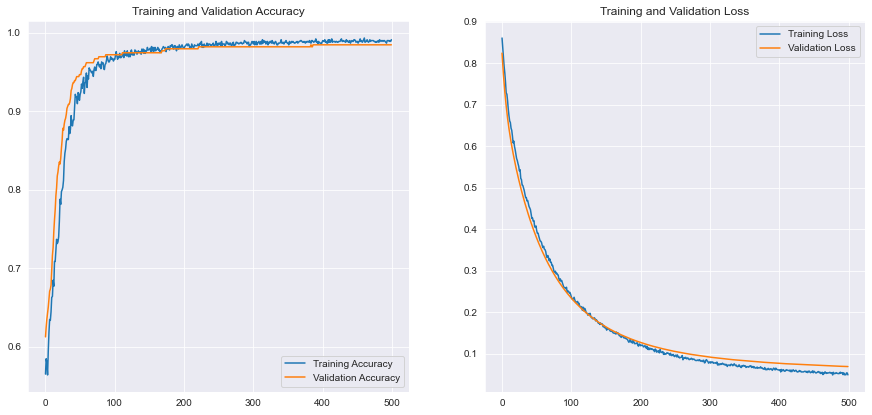

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(numEpochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
predictions = np.argmax(model.predict(x_val), axis=-1)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val_original, predictions, target_names = ['Identifiable (Class 0)','Unidentifiable (Class 1)']))

                          precision    recall  f1-score   support

  Identifiable (Class 0)       0.98      0.99      0.98       197
Unidentifiable (Class 1)       0.99      0.98      0.98       198

                accuracy                           0.98       395
               macro avg       0.98      0.98      0.98       395
            weighted avg       0.98      0.98      0.98       395

